<a href="https://colab.research.google.com/github/mareamhmza/CTU_13/blob/main/dataprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

Outlier Detection and Handling:

Identify and handle outliers in the data. Outliers can significantly impact the results of data analysis or machine learning models.
Categorical Data Encoding:

If your dataset contains categorical features, you may need to encode them into numerical values. Common encoding methods include one-hot encoding, label encoding, or ordinal encoding, depending on the nature of the categorical data.
Scaling and Normalization:

Apart from Min-Max scaling, consider other scaling methods like standardization (z-score scaling) for features with different scales or distributions.
Feature Engineering:

Create new features based on domain knowledge or data exploration that can provide additional insights or improve model performance.
Data Imbalance Handling:

If your dataset has imbalanced classes in a classification problem, you may need to apply techniques like oversampling, undersampling, or using synthetic data to balance the classes.
Handling Text Data:

If your dataset includes text data, you can preprocess it by tokenizing, removing stop words, stemming/lemmatizing, and converting text to numerical representations using techniques like TF-IDF or Word Embeddings.
Date and Time Features:

Extract relevant information from date and time features, such as day of the week, month, year, or time since a specific event. These can often be valuable in time-series analysis.
Data Transformation and Dimensionality Reduction:

Consider advanced techniques like Principal Component Analysis (PCA) for dimensionality reduction or non-linear transformations if your data exhibits complex relationships.
Feature Scaling for Algorithms:

Some machine learning algorithms, such as SVM or K-Means, may require specific scaling methods. Ensure that your data is preprocessed according to the algorithm's requirements.
Handling Highly Correlated Features:

Detect and address multicollinearity among features. Highly correlated features can affect model stability and interpretability.
Feature Selection:

Beyond basic feature selection, explore techniques like Recursive Feature Elimination (RFE), feature importance from tree-based models, or univariate feature selection.
Data Splitting:

Split your dataset into training, validation, and test sets. This is crucial for model evaluation and preventing data leakage.
Cross-Validation:

Implement k-fold cross-validation to assess model performance and ensure generalization.
Data Cleaning and Quality Control:

Check for duplicate records, missing data that might still be present but not labeled as missing, or any other data quality issues.
Feature Extraction and Aggregation:

Create aggregated or summary features from raw data. For example, you can compute statistics over time periods or combine data from different sources.
Domain-Specific Preprocessing:

Depending on the domain of your data, you may need to apply domain-specific preprocessing steps. For example, in natural language processing, you might use sentiment analysis, named entity recognition, or topic modeling.
Data Visualization:

Use data visualization techniques to explore the data, understand relationships between features, and identify potential preprocessing needs.

'''

"\n\nOutlier Detection and Handling:\n\nIdentify and handle outliers in the data. Outliers can significantly impact the results of data analysis or machine learning models.\nCategorical Data Encoding:\n\nIf your dataset contains categorical features, you may need to encode them into numerical values. Common encoding methods include one-hot encoding, label encoding, or ordinal encoding, depending on the nature of the categorical data.\nScaling and Normalization:\n\nApart from Min-Max scaling, consider other scaling methods like standardization (z-score scaling) for features with different scales or distributions.\nFeature Engineering:\n\nCreate new features based on domain knowledge or data exploration that can provide additional insights or improve model performance.\nData Imbalance Handling:\n\nIf your dataset has imbalanced classes in a classification problem, you may need to apply techniques like oversampling, undersampling, or using synthetic data to balance the classes.\nHandling 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Creating a sample dataset
data = {
    'Student_ID': range(1, 21),
    'Math_Score': np.random.randint(50, 100, 20).astype(float),  # Convert to float to support NaN
    'English_Score': np.random.randint(50, 100, 20).astype(float),  # Convert to float to support NaN
    'Science_Score': np.random.randint(50, 100, 20).astype(float)  # Convert to float to support NaN
}

# Introduce some missing values
data['Math_Score'][3] = np.nan
data['English_Score'][8] = np.nan
data['Science_Score'][15] = np.nan

df = pd.DataFrame(data)

# Display the dataset with missing values
print("Sample Dataset with Missing Values:")
print(df)

# Handling missing values (e.g., using mean imputation)
df.fillna(df.mean(), inplace=True)

# Display the dataset after filling missing values
print("\nSample Dataset after Handling Missing Values:")
print(df)

# Normalization (e.g., min-max scaling)
scaler = MinMaxScaler()
df[['Math_Score', 'English_Score', 'Science_Score']] = scaler.fit_transform(df[['Math_Score', 'English_Score', 'Science_Score']])
df[['Math_Score', 'English_Score', 'Science_Score']] *= 100

Sample Dataset with Missing Values:
    Student_ID  Math_Score  English_Score  Science_Score
0            1        53.0           63.0           90.0
1            2        88.0           79.0           86.0
2            3        68.0           92.0           58.0
3            4         NaN           58.0           70.0
4            5        59.0           76.0           66.0
5            6        68.0           57.0           77.0
6            7        73.0           92.0           70.0
7            8        56.0           53.0           77.0
8            9        69.0            NaN           62.0
9           10        51.0           57.0           58.0
10          11        58.0           51.0           66.0
11          12        99.0           53.0           92.0
12          13        96.0           79.0           78.0
13          14        79.0           84.0           93.0
14          15        54.0           80.0           62.0
15          16        73.0           79.0           

In [ ]:
# Summary statistics after normalization
summary_stats = df.describe()
print("\nSummary Statistics after Normalization:")
print(summary_stats)


#  count: This row tells you the number of non-missing (non-NaN) data points for each column. In this case, there are 20 data points for all columns.

#  mean: This row represents the mean (average) of each column after normalization. It gives you an idea of the central tendency of the data. For example, the mean Math_Score is approximately 54.9, the mean English_Score is about 42.2, and the mean Science_Score is approximately 52.6.

#  std: This row shows the standard deviation of each column. It measures the amount of variation or dispersion in the data. A larger standard deviation indicates more spread in the data. For instance, the standard deviation of Math_Score is around 30.1, English_Score is about 30.4, and Science_Score is around 26.2.

#  min: This row displays the minimum value in each column after normalization. It tells you the lowest score observed in the dataset. After normalization, the minimum values are all 0.0 for Math_Score, English_Score, and Science_Score.

# 25% (percentile): This row gives the 25th percentile value for each column. It's the value below which 25% of the data falls. For instance, the 25th percentile Math_Score is approximately 41.5, 25th percentile English_Score is around 17.4, and 25th percentile Science_Score is about 33.8.

# 50% (percentile): This row represents the median, which is the 50th percentile value. It's the middle value when the data is sorted. The median Math_Score is around 55.9, the median English_Score is about 40.7, and the median Science_Score is approximately 53.8.

# 75% (percentile): This row provides the 75th percentile value. It's the value below which 75% of the data falls. For example, the 75th percentile Math_Score is approximately 72.2, 75th percentile English_Score is about 59.2, and 75th percentile Science_Score is around 72.5.

# max: This row displays the maximum value in each column after normalization. It represents the highest score observed in the dataset. After normalization, the maximum values are all 100.0 for Math_Score, English_Score, and Science_Score.




Summary Statistics after Normalization:
       Student_ID  Math_Score  English_Score  Science_Score
count    20.00000   20.000000      20.000000      20.000000
mean     10.50000   45.327605      54.691076      54.306220
std       5.91608   27.184207      34.511696      29.503050
min       1.00000    0.000000       0.000000       0.000000
25%       5.75000   23.979592      19.021739      33.522727
50%      10.50000   45.112782      63.043478      57.834928
75%      15.25000   60.714286      81.521739      77.840909
max      20.00000  100.000000     100.000000     100.000000


In [ ]:
# PCA for dimensionality reduction (not necessarily needed in this example)
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(df[['Math_Score', 'English_Score', 'Science_Score']])
df_pca = pd.DataFrame(data=principal_components, columns=['Principal_Component_1', 'Principal_Component_2'])

In [ ]:
# Summary statistics after PCA (if applied)
summary_stats_pca = df_pca.describe()
print("\nSummary Statistics after PCA:")
print(summary_stats_pca)



Summary Statistics after PCA:
       Principal_Component_1  Principal_Component_2
count           2.000000e+01           2.000000e+01
mean           -3.552714e-15           5.839773e-15
std             3.529230e+01           3.009821e+01
min            -4.635409e+01          -4.928639e+01
25%            -3.032588e+01          -2.435389e+01
50%            -4.094687e-01          -4.377232e-01
75%             3.581347e+01           1.747276e+01
max             5.768383e+01           5.438813e+01


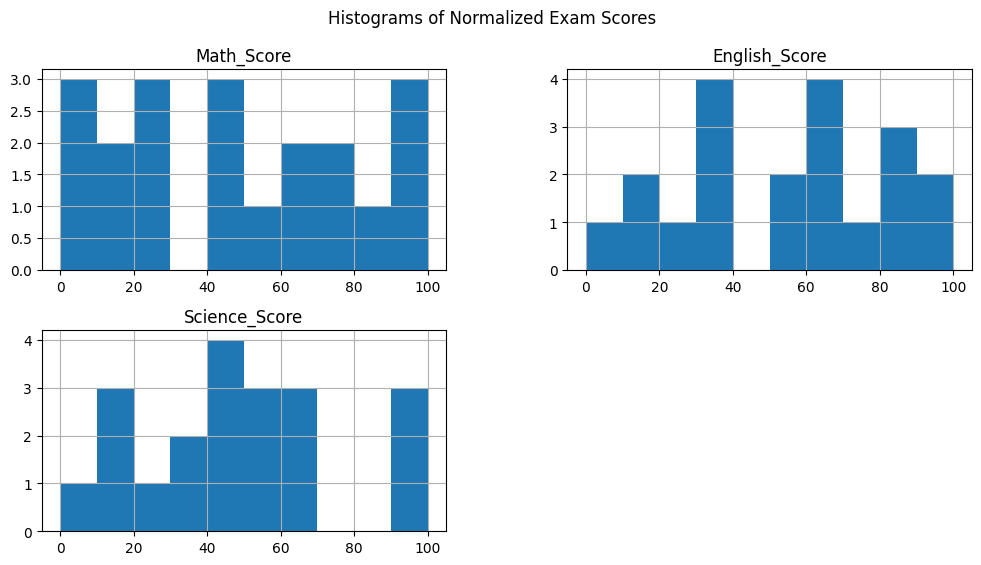

In [ ]:

# Histograms of normalized exam scores
df[['Math_Score', 'English_Score', 'Science_Score']].hist(bins=10, figsize=(12, 6))
plt.suptitle("Histograms of Normalized Exam Scores")
plt.show()



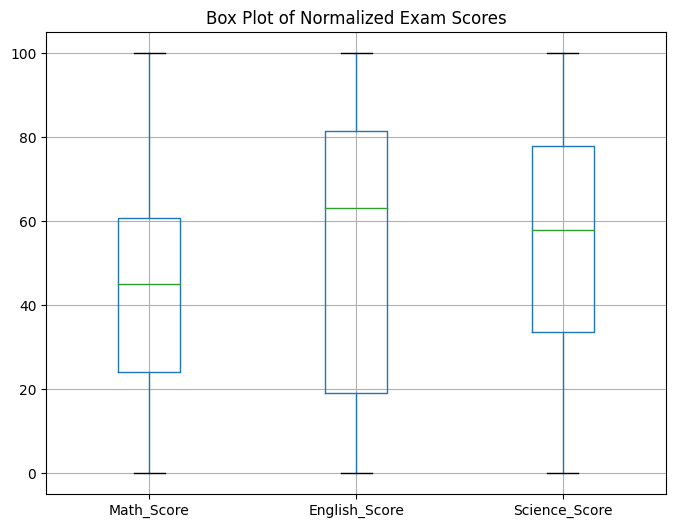

In [ ]:
# Box plots for each subject after normalization
df[['Math_Score', 'English_Score', 'Science_Score']].boxplot(figsize=(8, 6))
plt.title("Box Plot of Normalized Exam Scores")
plt.show()


# A box plot (or box-and-whisker plot) is a graphical representation of the distribution of a dataset. When used to visualize normalized data, such as the "Box plots for each subject after normalization" in your code, it serves several purposes:

# Summary of Data Distribution: Box plots provide a concise summary of the distribution of a dataset. They display key statistics, including the median, quartiles, and potential outliers, in a visually intuitive manner.

# Central Tendency: The line inside the box represents the median, which is the middle value of the dataset. It provides insight into the central tendency of the data. In the context of normalized exam scores, it shows the typical score for each subject.

# Variability: The size of the box, or the length of the "box," represents the interquartile range (IQR). The IQR measures the spread of data between the first quartile (25th percentile) and the third quartile (75th percentile). A larger box indicates greater variability in the data.

# Outliers: The "whiskers" extending from the box show the range of the data, and any points beyond the whiskers are considered outliers. Outliers are data points that fall significantly below or above the typical range. In the context of exam scores, they could represent exceptional or problematic scores.

# Comparison: Box plots allow for easy comparison between different subjects (in your case, Math, English, and Science). You can assess whether the scores are distributed similarly or if there are significant differences in their central tendencies, variability, or the presence of outliers.

# Identifying Skewness: The orientation of the box plot can also provide insights into the skewness of the data distribution. For a symmetric distribution, the box will be approximately centered on the median, while for skewed data, the box might be shifted toward one end.

# Detecting Data Quality: Box plots can help identify issues with data quality. For instance, if all the data points in a subject's box plot are clustered around a single value, it may indicate that the data is not diverse or representative.
